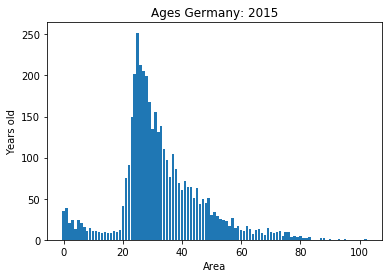

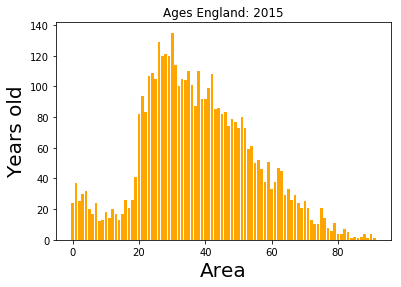

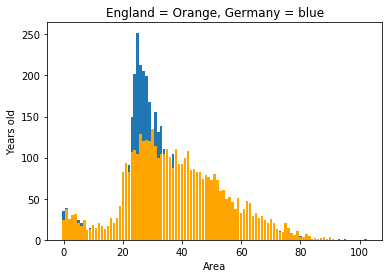

In [15]:
import kkdata
import matplotlib.pyplot as plt
import numpy as np

#UK = 5170
#GER = 5180
#France = 5130


#Function that can retvrieve ages for diffrent countries in areas
def ageStats(year=2015, country=5180):
    res = {}
    for area in kkdata.STATISTICS[year].keys():
        for age in kkdata.STATISTICS[year][area]:
            for k, v in kkdata.STATISTICS[year][area][age].items():
                if(k == country):
                    res.setdefault(age, 0)
                    res[age] += v
                    
    return res

germany_values = ageStats(2015, 5180)
england_values = ageStats(2015, 5170)


#makes a only german figure
plt.figure
plt.title("Ages Germany: 2015", fontsize=12)
plt.xlabel("Area", fontsize=10)
plt.ylabel("Years old", fontsize=10)
plt.bar(germany_values.keys(), germany_values.values())
plt.show()


#crates a only england figure
plt.figure
plt.title("Ages England: 2015", fontsize=12)
plt.xlabel("Area", fontsize=20)
plt.ylabel("Years old", fontsize=20)
plt.bar(england_values.keys(), england_values.values(), color="orange")
plt.show()

#creates a figure comparing the two
plt.figure
plt.title("England = Orange, Germany = blue", fontsize=12)
plt.xlabel("Area", fontsize=10)
plt.ylabel("Years old", fontsize=10)
plt.bar(germany_values.keys(), germany_values.values())
plt.bar(england_values.keys(), england_values.values(), color="orange")
plt.show()


Total Germans: 3574
Total French 1885
There are 1689 More Germans


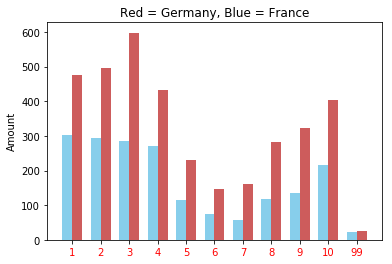

In [48]:
#French vs German

#calculates how many of certain nationality is in each neighbourhood and returns dictionary
def howManyEachNeighbourhood(year=2015, country=5180):
    res = {}
    for area in kkdata.STATISTICS[year].keys():
        res.setdefault(area, 0)
        for age in kkdata.STATISTICS[year][area]:
            if(age >= 20 and age <= 65):
                for k, v in kkdata.STATISTICS[year][area][age].items():
                    if(k == country):
                        res[area] += v            
    return res

germany = howManyEachNeighbourhood()

total_ger = 0
for k, v in germany.items():
    total_ger += v

france = howManyEachNeighbourhood(2015, 5130)
total_french = 0
for k, v in france.items():
    total_french += v

    #Calculates and prints germans and french amounts
print('Total Germans: ' + str(total_ger))
print('Total French ' + str(total_french))
more_germans = total_ger - total_french
print('There are ' + str(more_germans) + ' More Germans')


ind = np.arange(len(france))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, france.values(), width,
                color='SkyBlue', label='France')
rects2 = ax.bar(ind + width/2, germany.values(), width,
                color='IndianRed', label='Germany')

ax.set_ylabel('Amount')
ax.set_title('Red = Germany, Blue = France')
plt.xticks(range(len(france.keys())), france.keys(), color='red')

plt.show()


In [49]:
#Create a pie chart showing the 5 major citizen groups of age between 20-65


#returns dict with all nationalities and their amount
def howManyEachNeighbourhood(year=2000):
    res = {}
    for area in kkdata.STATISTICS[year].keys():
        for age in kkdata.STATISTICS[year][area]:
            for k, v in kkdata.STATISTICS[year][area][age].items():
                res.setdefault(k, 0)
                res[k] += v
               
    return res



#Sort it, and make it only top 5
values_sorted = sorted(howManyEachNeighbourhood().items(), key=lambda x: x[1], reverse=True)
values_sliced = values_sorted[0:5]

#Make a piechart and display it in browser
import pygal

pie_chart = pygal.Pie()
pie_chart.title = 'Top 5 countries in pie chart'
pie_chart.add(str(values_sliced[0][0]), values_sliced[0][1])
pie_chart.add(str(values_sliced[1][0]), values_sliced[1][1])
pie_chart.add(str(values_sliced[2][0]), values_sliced[2][1])
pie_chart.add(str(values_sliced[3][0]), values_sliced[3][1])
pie_chart.add(str(values_sliced[4][0]), values_sliced[4][1])

pie_chart.render_in_browser()



file:///var/folders/1q/kftllks51qd54789bsy_tp6w0000gn/T/tmp6rap1wz9.html


In [50]:
import json
import requests
import folium
import urllib


#playing with map, 
def get_city_location(city='Copenhagen'):
    """Get the location coordinates from OpenStreetMaps"""
    url_nomatim_api = 'https://nominatim.openstreetmap.org/search'
    r = requests.get(url_nomatim_api, params={'format': 'json', 'city': 'Copenhagen'})
    results = r.json()  # Potentially many matches
    print('results: ',results)
    location = results[0]
    lat, lon = float(location['lat']), float(location['lon'])
    return lat, lon




m = folium.Map(location=[55.6867243, 12.5700724])

folium.Marker(
[55.6890472438, 12.5928976284],
popup='Den lille havfrue'
).add_to(m)

folium.Marker(
[55.623830838, 12.641497434],
popup='Copenhagen Airport'
).add_to(m)

m